# Downloading Dataset: 

Download and unzip the food-101 dataset

https://www.kaggle.com/kmader/food41

Food-101 is a dataset consisting of 101 food classes with 1000 images per class. For each class, 250 images are reserved as for the test set and the rest 750 images for training (80% train, 20% val). In the directory food-101 we find a folder with images and one with meta information. The meta information tells us what the train and test (validation) images are.

# Imports

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
import os
from os import listdir
from os.path import isfile, join
import os
from collections import defaultdict
import shutil, sys 
import pandas as pd
import seaborn as sns




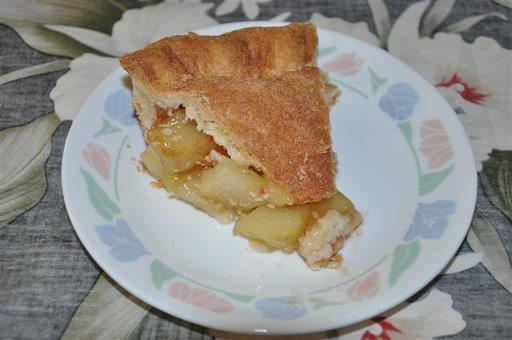

In [16]:
path_IMG = './food-101/images/apple_pie'
name = '68383.jpg'
fullname = f'{path_IMG}/{name}' # f' format them together
load_img(fullname) #function imported 

In [17]:
!ls food-101/

images meta


In [18]:
!ls food-101/meta

classes.txt labels.txt  test.json   test.txt    train.json  train.txt


In [19]:
!ls food-101/images

apple_pie               eggs_benedict           onion_rings
baby_back_ribs          escargots               oysters
baklava                 falafel                 pad_thai
beef_carpaccio          filet_mignon            paella
beef_tartare            fish_and_chips          pancakes
beet_salad              foie_gras               panna_cotta
beignets                french_fries            peking_duck
bibimbap                french_onion_soup       pho
bread_pudding           french_toast            pizza
breakfast_burrito       fried_calamari          pork_chop
bruschetta              fried_rice              poutine
caesar_salad            frozen_yogurt           prime_rib
cannoli                 garlic_bread            pulled_pork_sandwich
caprese_salad           gnocchi                 ramen
carrot_cake             greek_salad             ravioli
ceviche                 grilled_cheese_sandwich red_velvet_cake
cheese_plate            grilled_salmon          risotto
cheesecake        

In [23]:
data_dir = 'food-101/images/'
food_dir = sorted(glob(data_dir+'*'))
len(food_dir )

101

In [24]:
#Check meta classes
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


In [10]:
#Check file names in one category
!ls food-101/images/cheesecake/ | head -10

1001446.jpg
1004515.jpg
1004807.jpg
1017408.jpg
1021942.jpg
1023543.jpg
102854.jpg
1034351.jpg
1035453.jpg
1037609.jpg


In [25]:
food_dir[17]

'food-101/images/cheesecake'

In [12]:
#Check a couple of cheesecake image shapes to verify that the shapes also vary within a class.
for i in range(10):
  img=os.listdir(food_dir[17])[i]
  print(plt.imread(os.path.join(food_dir[17], img)).shape)

(512, 512, 3)
(512, 512, 3)
(384, 512, 3)
(512, 306, 3)
(384, 512, 3)
(512, 512, 3)
(384, 512, 3)
(384, 512, 3)
(512, 512, 3)
(512, 512, 3)


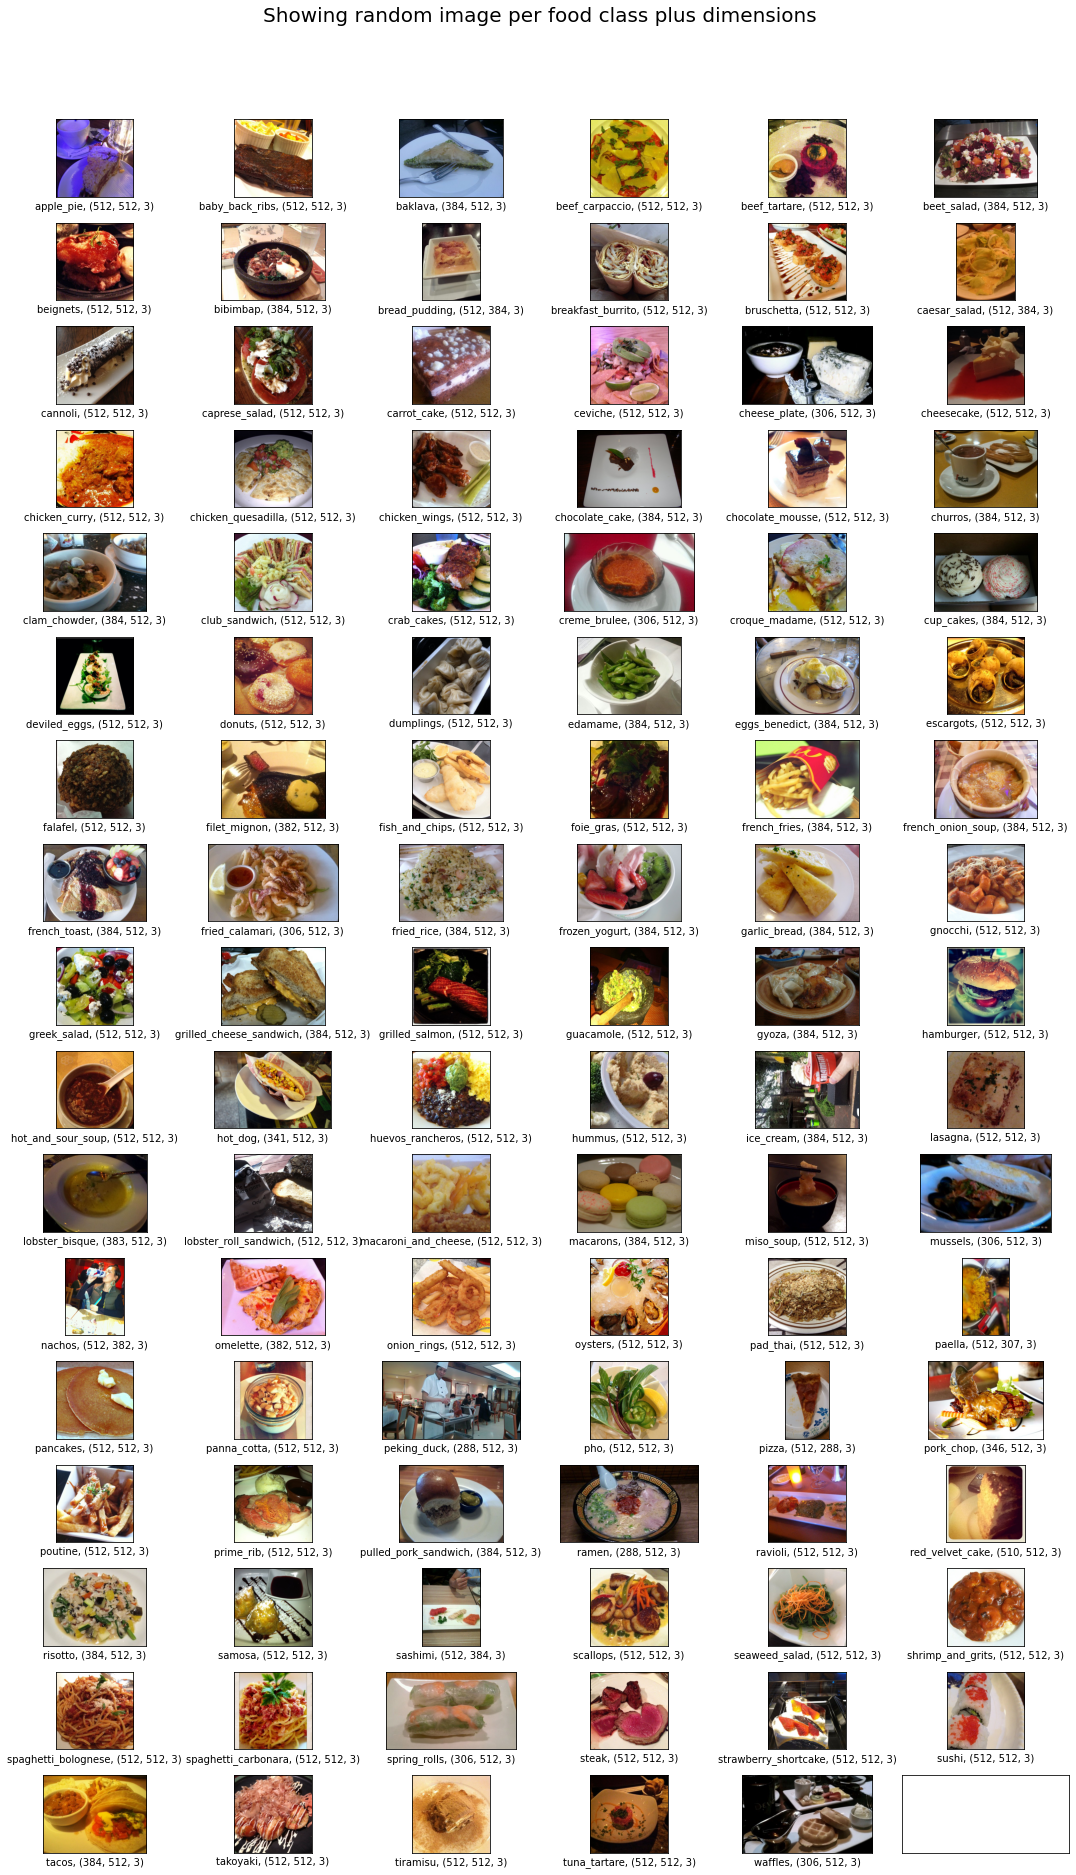

In [27]:
#Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, axarr = plt.subplots(rows, cols, figsize=(15, 25))
fig.suptitle('Showing random image per food class plus dimensions', y=1.04, fontsize=20)
food_nr=0
for i in range(rows):
    for j in range(cols):
      try:
        rand_fn=np.random.choice(os.listdir(food_dir[food_nr]))
        img1 = plt.imread(os.path.join(food_dir[food_nr], rand_fn))
        axarr[i][j].imshow(img1)
        axarr[i][j].set_xlabel('%s, %s' % (sorted(os.listdir(data_dir))[food_nr], img1.shape))
        food_nr +=1
      except:
        break

plt.setp(axarr, xticks=[], yticks=[])
plt.tight_layout()

In [28]:
class_N = {}
N_class = {}
with open('food-101/meta/classes.txt', 'r') as txt:
    classes = [i.strip() for i in txt.readlines()]
    class_N = dict(zip(classes, range(len(classes))))
    N_class = dict(zip(range(len(classes)), classes))
    class_N = {i: j for j, i in N_class.items()}
class_N_sorted = collections.OrderedDict(sorted(class_N.items()))
print(class_N)

{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheesecake': 16, 'cheese_plate': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50, 'guacamole': 5

# Split train and test dataset

Food-101 Dataset contains 101,000 images across 101 classes. The dataset is split into 75,750 training and 25,250 test images which defined by test.json and train.json. The original download has the train and test images in the same folders. Here we separate out train and test images into different directories. 


Also, the Food-101 dataset has a provided train/test split.

train ='./food-101/meta/train.txt'

test ='./food-101/meta/test.txt'

Note: 

In [72]:
def copytree(src, dst, symlinks = False, ignore = None):
    if not os.path.exists(dst):
        os.makedirs(dst)
        shutil.copystat(src, dst)
    lst = os.listdir(src)
    if ignore:
        excl = ignore(src, lst)
        lst = [x for x in lst if x not in excl]
    for item in lst:
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if symlinks and os.path.islink(s):
            if os.path.lexists(d):
                os.remove(d)
            os.symlink(os.readlink(s), d)
            try:
                st = os.lstat(s)
                mode = stat.S_IMODE(st.st_mode)
                os.lchmod(d, mode)
            except:
                pass # lchmod not available
        elif os.path.isdir(s):
            copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

In [73]:
def generate_dir_file_map(path):
    dir_files = defaultdict(list)
    with open(path, 'r') as txt:
        files = [l.strip() for l in txt.readlines()]
        for f in files:
            dir_name, id = f.split('/')
            dir_files[dir_name].append(id + '.jpg')
    return dir_files

In [74]:
def ignore_train(d, filenames):
    print(d)
    subdir = d.split('/')[-1]
    to_ignore = train_dir_files[subdir]
    return to_ignore

In [75]:
def ignore_test(d, filenames):
    print(d)
    subdir = d.split('/')[-1]
    to_ignore = test_dir_files[subdir]
    return to_ignore

In [76]:
if len(sys.argv) > 1:
    root_path = sys.argv[1] +'/'
else:
    root_path =''

In [77]:
if not os.path.isdir(root_path+'food-101/test') or not os.path.isdir(root_path+'food-101/train'):
    train_dir_files = generate_dir_file_map('food-101/meta/train.txt')
    test_dir_files = generate_dir_file_map('food-101/meta/test.txt')
    copytree('food-101/images',root_path+'food-101/test', ignore=ignore_train)
    copytree('food-101/images', root_path+'food-101/train', ignore=ignore_test)
else:
    print('Train/Test files already copied into separate folders.')

food-101/images
food-101/images/foie_gras
food-101/images/club_sandwich
food-101/images/cheese_plate
food-101/images/cup_cakes
food-101/images/garlic_bread
food-101/images/gnocchi
food-101/images/ice_cream
food-101/images/samosa
food-101/images/donuts
food-101/images/tuna_tartare
food-101/images/filet_mignon
food-101/images/seaweed_salad
food-101/images/french_toast
food-101/images/chicken_curry
food-101/images/shrimp_and_grits
food-101/images/steak
food-101/images/cheesecake
food-101/images/red_velvet_cake
food-101/images/waffles
food-101/images/churros
food-101/images/gyoza
food-101/images/lobster_roll_sandwich
food-101/images/huevos_rancheros
food-101/images/breakfast_burrito
food-101/images/grilled_cheese_sandwich
food-101/images/spaghetti_bolognese
food-101/images/falafel
food-101/images/poutine
food-101/images/greek_salad
food-101/images/beef_tartare
food-101/images/fried_calamari
food-101/images/guacamole
food-101/images/ravioli
food-101/images/lobster_bisque
food-101/images/bee

Problems in dataset:
   - Small amount of training data for each class
   - Many classes look similar to each other (steak vs filet mignon)
   - Many images in the dataset have poor lighting or framing.
   - Several images contain multiple correct classes (ex burgers & fries)
   - Number of mislabeled images.
   - Image shapes vary within class 

Most of the dataset problems can be solved through applying "Data augmentation". It will be applied in the test time to increase the accuracy.